# Laboratorio Optimización No. 10

> Daniel Alvarez - 201911320  
Maria Jose Vieda - 201923359

### Importacion de Librerias:

In [1]:
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import LinearLocator
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sympy as sym
import pandas as pd
from IPython.display import display
from matplotlib.patches import FancyArrowPatch
import numdifftools as nd
from mpl_toolkits.mplot3d import axes3d

Inicialmente, se defie la función con la cual se comprueba si un sistema es concavo o convexo. Donde $γ : \mathbb{R}^2 → \mathbb{R} $ tal que:

In [18]:
# se define una función que retorna el valor de lambda
def f(x, y):
    return 3*(1-x)**2*np.exp(-(x**2)-(y+1)**2)-10*((x/5)-x**3 - y**5)*np.exp(-x**2 -y**2)-(1/3)*np.exp(-(x+1)**2 - y**2)
# se define una función punto pendiente con restricción en 0
def pem(p1, p2, x):
    # se define la formula punto pendiente
    if p2[0] - p1[0] != 0:
        # se toma la pendiente
        m = (p2[-1] - p1[-1])/(p2[0] - p1[0])
        b = p1[-1] - m*p1[0]
        return m*x + b
    else:
        m = 10**18
        return m*x

In [3]:
# se define la resolución del step
resolution = 1000
# se crea el vector de espacio
x = np.linspace(-5, 5, resolution)

- Punto 1

Ahora, se evaluó la función descrita anteriormente sobre segmentos de recta entre dos puntos $x_1 = (x_1, y_1)$ y $x_2 = (x_2, y_2)$. Posteriormente se muestra la gráfica en 2D de la función evaluada en dichos segmentos. Finalmente se realiza la prueba de convexidad/concavidad para cada par de puntos a continuación:

In [4]:
# se crea una matriz de arreglos para los vectores x's
x1 = np.array([[1/10, 1],[-11/10, 17/10],[1, -1],[0, 13/5]])
# se crea una matriz de arreglos para los vec
y = np.array([[-11/10, -1],[12/10, -17/10],[-16/10, 3/5],[0, -12/5]])
#x2[0,:]

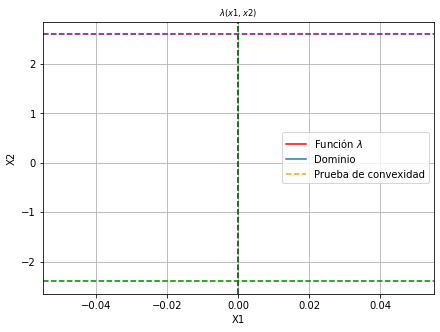

In [28]:
# se crea una clase para realizar las graficas en 2-D
class graph_2D:
    # se inicializa los parametros de la misma 
    def __init__(self, fun, p1, p2, r):

        self.resolution = r
        if p1[0] < p2[0]:
            self.x = np.linspace(p1[0], p2[0], self.resolution)
        else:
            self.x = np.linspace(p2[0], p1[0], self.resolution)
        self.fun = fun
        self.p1 = p1
        self.p2 = p2
    # se crea una función interna de graficación
    def graph(self):
        
        plt.figure(figsize=(7,5))
        plt.plot(self.x, self.fun(self.x,pem(self.p1, self.p2, self.x)), color ='red')
        plt.plot(self.x, pem(self.p1, self.p2, self.x))
        self.pc1 = np.array([self.p1[0], self.fun(self.p1[0], self.p1[-1])])
        self.pc2 = np.array([self.p2[0], self.fun(self.p2[0], self.p2[-1])])
        plt.plot(self.x, pem(self.pc1,self.pc2, self.x), color = 'orange', linestyle = '--')
        # ax = plt.contour(self.x, pem(self.p1, self.p2, self.x), self.fun(self.x,pem(self.p1, self.p2, self.x)))
        # plt.colorbar(ax, shrink=0.5, aspect=5)
        plt.axhline(y = self.p1[-1], color = 'purple', linestyle = '--')
        plt.axhline(y = self.p2[-1], color = 'g', linestyle = '--')
        plt.axvline(x = self.p1[0], color = 'purple', linestyle = '--')
        plt.axvline(x = self.p2[0], color = 'g', linestyle = '--')
        plt.grid()
        plt.legend([r'Función $\lambda$','Dominio','Prueba de convexidad'])
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title(r'$\lambda(x1,x2)$', fontsize='small')
        plt.show()

# se inicializa el hilo principal
if __name__ == '__main__':
    # para variar la grafica, variar el U
    U = 3   
    graph = graph_2D(f, x1[U,:], y[U,:], resolution)
    graph.graph()

Sí, es posible evidenciar la convexidad y concavidad con los ejemplos mostrados anteriormente debido a que al graficarlo y realizarle dichas pruebas es evidente como la función satisface los requerimientos de esta por lo que nos indica que la superficie que muestra una curvatura, siendo su centro el lado con mayor prominencia. Cabe mencionar que, más que todo es a nivel global que local lo que se evidencia de cada función evaluada en este punto.

> Realizando un análisis practico se llego a la siguiente conclusion donde PP es par de puntos:
$$PP_1 \rightarrow convexa$$
$$PP_2 \rightarrow convexa$$
$$PP_3 \rightarrow convexa$$
$$PP_4 \rightarrow no\;\; convexa$$
> Nótese que la relación de convexidad nace desde la expansión del teorema de desigualdad triangular, por lo que expresado en su forma funciónal se parte de la premisa de que el teorema de convexidad se cumple para una función, en calidad de función sea inyectiva o biyectiva, toda expresión que tenga dos imagenes para un mismo dominio no se considera función, por lo que, cumpla o no la condición no implica convexidad.

- Punto 2

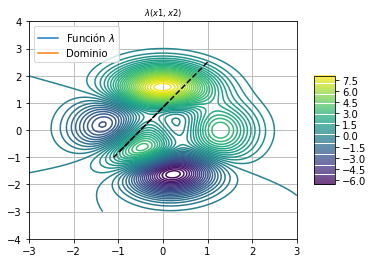

In [24]:
# se crea la función de graficación de las curvas de nivel
def punto2(U):
    feature_x = np.linspace(-3, 3, 100) 
    feature_y = np.linspace(-3, 3, 100) 
    # Creating 2-D grid of features 
    [X, Y] = np.meshgrid(feature_x, feature_y) 
    z = f(X, Y)
    # se grafican las curvas de nivel de la función lambda
    ax = plt.contour(X, Y, z, 50)
    plt.plot(X,pem(x1[U,:], y[U,:],X))
    plt.colorbar(ax, shrink=0.5, aspect=5)
    plt.grid()
    plt.legend([r'Función $\lambda$', 'Dominio'])
    plt.xlim(-3,3)
    plt.ylim(-4,4)
    j = np.linspace(x1[U,:], y[U,:], resolution)
    # se grafica la curva de dominio de la recta
    plt.plot(j, pem(x1[U,:], y[U,:], j), color = 'black', linestyle = '--')
    plt.title(r'$\lambda(x1,x2)$', fontsize='small')
    plt.show()
if __name__ == '__main__':
    # para variar la grafica, variar el valor de recta donde
    # 0 -> punto 0
    # 1 -> punto 1
    # ...
    # 3 -> punto 3
    recta = 0
    punto2(recta)

- Punto 3

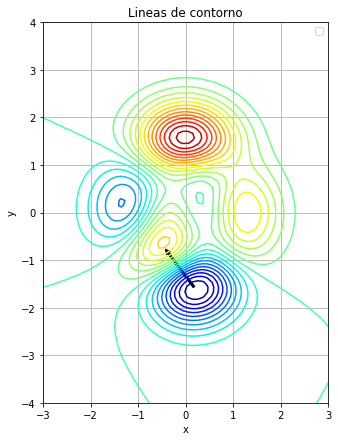

In [16]:
# se duplica la función con el fin de que entre por parametro un vector de [x, y]
def f1(x):
    return 3*(1-x[0])**2*np.exp(-(x[0]**2)-(x[1]+1)**2)-10*((x[0]/5)-x[0]**3 - x[1]**5)*np.exp(-x[0]**2 -x[1]**2)-(1/3)*np.exp(-(x[0]+1)**2 - x[1]**2)

# se crea un vector de variables en para los puntos de evaluación del gradiente
values = np.array([[0, 0.16],[0.2, -1.6],[1, 1.2],[0.3, 0.3]])

def punto3(fun, pivot):
    
    feature_x = np.linspace(-5, 5, 100) 
    feature_y = np.linspace(-5, 5, 100)

    # Creating 2-D grid of features 
    [X, Y] = np.meshgrid(feature_x, feature_y) 

    # gradient 

    grada = nd.Gradient(fun)(pivot)

    # arrow

    arrow = FancyArrowPatch((pivot[0], pivot[-1]), (pivot[0]+grada[0], pivot[-1]+grada[-1]),    
                            arrowstyle='simple', color='k', mutation_scale=10)

    fig, ax = plt.subplots(1, 1) 
    fig.set_size_inches(7,7)
    # plots contour lines 
    ax.contour(X, Y, f1([X, Y]), 25, cmap = 'jet') 
    ax.grid(True)
    ax.axis('scaled')
    #ax.clabel(cp, inline=1, fontsize=10)  
    ax.set_title('Lineas de contorno')
    ax.set_xlim(-3,3)
    ax.set_ylim(-4,4) 
    ax.legend(['Curvas de nivel'])
    ax.set_xlabel('x') 
    ax.set_ylabel('y') 
    ax.add_patch(arrow)
    plt.show() 

if __name__ == "__main__":
    # para variar el gradiente variar el n
    n = 1
    punto3(f1,values[n,:])

- Punto 4

.a 

C:\Users\danie\AppData\Local\Temp\ipykernel_2792\191313903.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='3d')


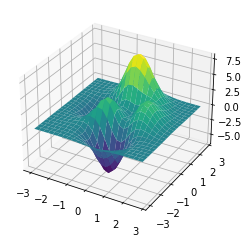

In [9]:
# grafica para conocer la veracidad de los maximos y minimos

fig = plt.figure()

# Tomo el eje actual y defino una proyección 3D
ax = plt.gca(projection='3d')

# Dibujo 3D
X = np.arange(-3, 3, 0.25)
Y = np.arange(-3, 3, 0.25)

# el metodo meshgrid devuelve una matriz de coordenadas
# a partir de vectores de coordendas, que usamos para
# los datos del eje Z
X, Y = np.meshgrid(X, Y)
surface = ax.plot_surface(X, Y, f(X,Y), rstride=1, cstride=1, cmap='viridis', edgecolor='none')


In [15]:
# se crea una tabla con los valores estimados de max, min y puntos de silla 
tabla = {'Tipo':['Máx','Máx','Máx','min','min','p.s'],'Coordenada':[] }

# maximos

tabla['Coordenada'].append([0,1.5])
tabla['Coordenada'].append([1.3,0])
tabla['Coordenada'].append([-0.5,-0.65])

# minimos 

tabla['Coordenada'].append([-1.3,0.2])
tabla['Coordenada'].append([0.2,-1.8])

# puntos de silla 

tabla['Coordenada'].append([0.3,0.4])

pd.set_option('max_colwidth',75)
df_sol = pd.DataFrame(tabla)
print('\n Puntos criticos de la función lambda: \n')
display(df_sol)


 Puntos criticos de la función lambda: 



,Tipo,Coordenada
0,Máx,"[0, 1.5]"
1,Máx,"[1.3, 0]"
2,Máx,"[-0.5, -0.65]"
3,min,"[-1.3, 0.2]"
4,min,"[0.2, -1.8]"
5,p.s,"[0.3, 0.4]"


.b

> Es posible afirmar que el punto correspondiente a:
$$P_{max} = [0, 1.5]$$
> Esto en mayor parte a que como vemos el la proyección 3D y las curvas de nivel, solo tiene dominio en:
$$\real^{2}\in [-3,3]$$
> Por lo que por simple inducción si existe al menos 1 máximo que cumpla con la resrtricción:
$$f(x_11,x_12)x \geq f(x, y) \rightarrow x,y \in \real$$ 
> Se afirma que este es un máximo, de igual forma por complemento encontramos que el mímino global:
$$f(x_21,x_22)x \leq f(x, y) \rightarrow x,y \in \real$$
> Afirmando que el punto es:
$$P_{min} = [0.2,-1.8]$$